In [1]:
from ipyleaflet import Map, Marker, Polygon, basemaps

In [ ]:
center = (52.204793, 360.121558)

m = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=10)

marker = Marker(location=center, draggable=True)
m.add(marker);

display(m)

In [2]:
from netCDF4 import Dataset, num2date

In [2]:
import numpy as np
import xarray as xr
import xradar as xd

In [ ]:
# f1 = Dataset("/Users/brenda/data/mdv/mrms_3d/20150626/20150626_230012.mdv.nc")

In [6]:
# read dataset
#ds = xr.open_dataset("/Users/brenda/data/mdv/mrms_3d/20150626/20150626_230012.mdv.nc")
ds = xr.open_dataset("/Users/brenda/data/cfrad.20170408_001452.962_to_20170408_002320.954_KARX_Surveillance_SUR.nc")

# df = local_dataset.to_dataframe()  # convert to dataframe
display(ds)

<xarray.Dataset>
Dimensions:                           (frequency: 1, sweep: 5, r_calib: 1,
                                       time: 2880, range: 1832,
                                       n_points: 4165920)
Coordinates:
  * frequency                         (frequency) float32 2.77e+09
  * time                              (time) datetime64[ns] 2017-04-08T00:14:...
  * range                             (range) float32 2.125e+03 ... 4.599e+05
Dimensions without coordinates: sweep, r_calib, n_points
Data variables: (12/109)
    volume_number                     float64 ...
    platform_type                     |S32 ...
    primary_axis                      |S32 ...
    status_xml                        |S1 ...
    instrument_type                   |S32 ...
    radar_antenna_gain_h              float32 ...
    ...                                ...
    ZDR                               (n_points) float32 ...
    PHI                               (n_points) float32 ...
    RHO                               (n_points) float32 ...
    REF_s1                            (n_points) float32 ...
    REF_s3                            (n_points) float32 ...
    REF_s5                            (n_points) float32 ...
Attributes: (12/25)
    Conventions:          CF-1.7
    Sub_conventions:      CF-Radial instrument_parameters radar_parameters ra...
    version:              CF-Radial-1.4
    title:                
    institution:          
    references:           
    ...                   ...
    site_name:            
    scan_name:            Surveillance
    scan_id:              31
    platform_is_mobile:   false
    n_gates_vary:         true
    ray_times_increase:   true

In [8]:
#ds.x0[0]
#xy = np.meshgrid(ds.x0, ds.y0)
#xy

In [9]:
ds.DBZ[0,0,:,:].plot()
# uses very basic matplotlib plot operation. 

AttributeError: 'Dataset' object has no attribute 'DBZ'

In [9]:
dbz = ds.DBZ
# dbz = df["DBZ"]

#dbz.index

#dbz2 = local_dataset["DBZ"]
#display(dbz)
# (time, z0, y0, x0)
dbzt0z0 = dbz[0,0,:,:]
dbz_xy = np.squeeze(dbzt0z0).shape
display(dbz_xy)
#dbznp = dbzt0z0.tolist()

#display(dbznp[3017524])
#dbz[1,1]

# lats = f1.variables["y0"][:]
# lons = f1.variables["x0"][:]
# time = f1.variables["time"]

(1505, 2005)

In [10]:
#                      (time, z0, y0, x0)
time_i = 0
z0_i = 0
y0_i = 0
dbz = np.array(np.squeeze(ds.DBZ[time_i,z0_i,:,:])).reshape(-1)
#dbz = np.squeeze(ds.DBZ[time_i,z0_i,0:1505:500,0:2004:80])
#dbz_sample = dbz * -1/10 # [0:5, 0:5]  dbz has two dimensions: x0, y0!!! try .to_stacked_array 
#type(dbz_sample.to_numpy().tolist())
#dbz_sample.to_numpy().tolist()
len(dbz)

3017525

In [ ]:
a = np.array((1,2,3))
b = np.array((82,83,84))
np.column_stack((a,b)).tolist()
av = np.array(np.meshgrid(a,b)).T.reshape(-1,2)
av
# the grid is rectangular (x0 and y0 have different lengths
#x0y0 = np.column_stack((ds.x0,ds.y0)).tolist()  

t = ((11,21),(12,22),(13,23))
type(t)

g = np.random.uniform(-80, 80, (n, 2))
type(g)
np.column_stack((g,b)).tolist()
# print(dbz[110,50].values)
#somedata = np.random.uniform(-80, 80, (25, 2))
#display(somedata)

In [ ]:
n = 3
h = np.random.uniform(-80, 80, (n, 2))
h
#np.column_stack( h, [0,1,3])

In [ ]:
bx = [0, 2, 4, 6]
by = [0,-2,-4,-6]
yx = np.array(np.meshgrid(by, bx)).T.reshape(-1,2)
yx

In [11]:
#a = np.array((1,2,3))
#b = np.array((82,83,84))
#np.column_stack((a,b)).tolist()

av = np.array(np.meshgrid(ds.y0,ds.x0)).T.reshape(-1,2)
av_sample = av   # [0:1000:40]  
av_sample
#av_sample.tolist()
#av.size
#ds.x0.size * ds.y0.size
# the grid is rectangular (x0 and y0 have different lengths
#x0y0 = np.column_stack((ds.x0,ds.y0)).tolist()  

array([[  29.984999, -110.015015],
       [  29.984999, -110.00501 ],
       [  29.984999, -109.99502 ],
       ...,
       [  45.024998,  -89.99501 ],
       [  45.024998,  -89.985016],
       [  45.024998,  -89.97501 ]], dtype=float32)

In [12]:
class MdvMap:
    def __init__(self, points, values, radius=20):
        self.points = points
        self.values = values
        self.radius = radius

    @property
    def data(self):
        return np.column_stack((self.points, self.values))

    def as_leaflet_layer(self):
        from ipyleaflet import Heatmap
        return Heatmap(
            locations=self.data.tolist(),
            radius=self.radius, blur=0, gradient={0.4: "blue", 0.6: "cyan", 0.7: "lime", 0.8: "yellow", 1.0: "red"}
        )

In [ ]:
b.size

In [13]:
from ipyleaflet import Map, ZoomControl

#n = 1000
#data = MdvMap(
#    np.random.uniform(-80, 80, (n, 2)), # generates 1000 * 2 points (i.e. 1000 x,y coordinates)
#    np.random.uniform(0, 1000, n),
#)
#data = MdvMap(av, dbz)
zoom_range = 12
zoom_level = 2
radius = zoom_level
npoints = 100
ncoords = len(av_sample)
ndata = len(dbz)
data_sample_scale = (zoom_range + 1 - zoom_level) / zoom_range
nsamples = ncoords / 3
everyn = int( ncoords / nsamples )
everyn

#subset = av_sample[0:ncoords:5] # everyn]
#subset
#zoom_level / zoom_range

data = MdvMap(av_sample[0:ncoords:everyn], dbz[0:ndata:everyn], radius)

my_zoom_control = ZoomControl(position='topright')

# ipywidgets is powered by traitlets, this brings an observer pattern implementation 
# which allows you to react on widget attribute changes.

#def on_location_changed(event):
#    # Do some computation given the new marker location, accessible from `event['new']`
#    pass
# marker.observe(on_location_changed, 'location')
caption = widgets.Label(value='The slider value is in its initial position.')
def on_zoom_level_changed(event):
    # Adjust the radius and the sample spacing; get zoom level from event['new']
    caption.value = 'The zoom level is ' + event.new
    pass

#caption = widgets.Label(value='The slider value is in its initial position.')
#slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

#def handle_slider_change(change):
#    caption.value = 'The slider value is ' + (
#        'negative' if change.new < 0 else 'nonnegative'
#    )

#slider.observe(handle_slider_change, names='value')
#display(caption, slider)
 

# my_zoom_control.observe(on_zoom_level_changed, names='zoom')
#display(caption, my_zoom_control)
m = Map(center=(35, -92), zoom=zoom_level) #, zoom_control=False)
# m.add(my_zoom_control)
m.add(data)
#display(m)


NameError: name 'widgets' is not defined

In [44]:
import ipywidgets as widgets
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)


def on_button_clicked(b):
    with output:
        print("Button clicked. zoom level ")
    with m:
        # m.zoom = 8
        m = Map(center=(35, -92), zoom=8)
        

button.on_click(on_button_clicked)

output2 = widgets.Output()


def on_value_change(change):
    with output2:
        print(change['new'])

m.observe(on_value_change, names='zoom')

def on_field_selected(change):
    with output2:
        print(change['new'])
        
field_list = widgets.Select(
    options=['DBZ', 'VEL', '??'],
    value='DBZ',
    # rows=10,
    description='moment or field to display:',
    disabled=False
)
field_list.observe(on_field_selected)
m.add(field_list) # I don't think this does anything??
display(m, output2, field_list)

Button(description='Click Me!', style=ButtonStyle())

Output()

Map(bottom=1822.0, center=[35, -92], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

Output()

Select(description='moment or field to display:', options=('DBZ', 'VEL', '??'), value='DBZ')

In [42]:
m.controls

(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text', 'zoom_out_title']),
 AttributionControl(options=['position', 'prefix'], position='bottomright'))

In [1]:
import ipywidgets as widgets
from ipyleaflet import ZoomControl
# print(widgets.Widget.observe.__doc__)
print(ZoomControl.observe.__doc__)


caption = widgets.Label(value='The slider value is in its initial position.')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)

Setup a handler to be called when a trait changes.

        This is used to setup dynamic notifications of trait changes.

        Parameters
        ----------
        handler : callable
            A callable that is called when a trait changes. Its
            signature should be ``handler(change)``, where ``change`` is a
            dictionary. The change dictionary at least holds a 'type' key.
            * ``type``: the type of notification.
            Other keys may be passed depending on the value of 'type'. In the
            case where type is 'change', we also have the following keys:
            * ``owner`` : the HasTraits instance
            * ``old`` : the old value of the modified trait attribute
            * ``new`` : the new value of the modified trait attribute
            * ``name`` : the name of the modified trait attribute.
        names : list, str, All
            If names is All, the handler will apply to all traits.  If a list
            of str, handler wil

Label(value='The slider value is in its initial position.')

IntSlider(value=1, description='Slider', max=5, min=-5)

TypeError: Dimensions of C (1505, 2005) should be one smaller than X(1505) and Y(2005) while using shading='flat' see help(pcolormesh)

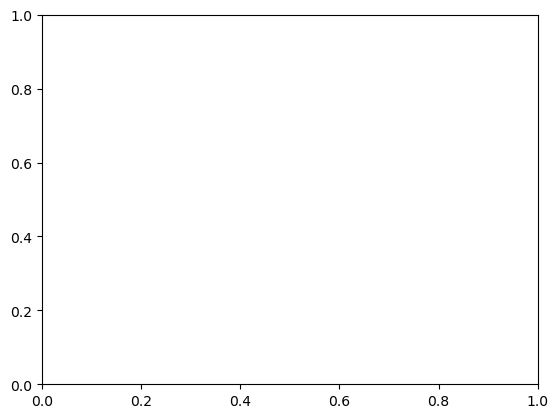

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# generate the image, i.e. plot
x = dbz[:,0]
y = dbz[0,:]
im = ax.pcolormesh(dbz[:,0], dbz[0,:], dbz)
# add a color bar
fig.colorbar(im, ax=ax)

In [7]:
dates = num2date(time[:], time.units)
time_of_day = dates[0].strftime("%Y-%m-%d %H:%M:%S")
print(time_of_day)

2015-06-26 23:00:12


In [15]:
dbz = f1.variables["DBZ"]
dbz_dimensions = f1.variables["DBZ"].dimensions
print(dbz_dimensions)
print(dbz[0,18,10,10])
type(dbz)
print(f1.variables.keys())
print(dbz)
print(len(lats), len(lons))

NameError: name 'f1' is not defined

In [11]:
print(lats[0], lons[0])

29.984999 -110.015015


In [29]:
center = (lats[0], lons[0])



m = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=10)

marker = Marker(location=center, draggable=True)
m.add(marker);

polysize_x = abs(lats[15] - lats[14]) / 0.5
polysize_y = abs(lons[15] - lons[14]) / 0.5
for ix in range(10, 30, 3):
    for iy in range(10,30, 3):
        x = lats[ix]
        y = lons[iy]
        polygon = Polygon(
            locations=[(x, y), (x+polysize_x, y), (x, y-polysize_y)],
            color="green",
            fill_color="green"
        )
        m.add(polygon);

# color scale using a choropleth layer?
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=unemployment,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add(layer)


display(m)

Map(center=[29.984999, -110.015015], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [2]:
import ipywidgets as widgets
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [3]:
w.value

17

In [4]:
w.value = 8

In [5]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'behavior',
 'continuous_update',
 'description',
 'description_allow_html',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'tabbable',
 'tooltip',
 'value']

In [6]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)
# link the callbacks and events on the browser side with jslink
mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

In [ ]:
# link a widget and the map